Mastercamp TD project

On importe toutes les librairies

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

On récupère les données



In [5]:
data=next(pd.read_csv("data/valeursfoncieres-2023.txt",chunksize=3727007,sep="|",decimal=","))
data=data.drop(["Identifiant de document","Reference document","1 Articles CGI","2 Articles CGI","3 Articles CGI","4 Articles CGI","5 Articles CGI","Identifiant local","Type de voie","Voie","B/T/Q","Code voie","Code postal","Commune","No voie","Type local"],axis=1)

data.head()

C:\Users\Kevin\AppData\Local\Temp\ipykernel_3444\2160402527.py:1: DtypeWarning: Columns (14,18,23,24,26,28,32,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data=next(pd.read_csv("data/valeursfoncieres-2023.txt",chunksize=3727007,sep="|",decimal=","))


,No disposition,Date mutation,Nature mutation,Valeur fonciere,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,...,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,1,05/01/2023,Vente,1070000.0,1,354,NaN,BD,334,NaN,...,NaN,NaN,NaN,1,3.0,0.0,0.0,NaN,NaN,NaN
1,1,05/01/2023,Vente,1070000.0,1,354,NaN,BD,336,NaN,...,NaN,NaN,NaN,1,3.0,0.0,0.0,NaN,NaN,NaN
2,1,05/01/2023,Vente,1070000.0,1,354,NaN,BD,336,NaN,...,NaN,NaN,NaN,1,2.0,233.0,8.0,NaN,NaN,NaN
3,1,03/01/2023,Vente,152200.0,1,404,NaN,D,2317,NaN,...,NaN,NaN,NaN,0,1.0,64.0,3.0,S,NaN,988.0
4,1,05/01/2023,Vente,269000.0,1,361,NaN,B,2405,NaN,...,NaN,NaN,NaN,0,1.0,73.0,3.0,S,NaN,835.0


Signification des variables catégorielles


In [6]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Valeurs uniques de {col}: {data[col].unique()}")

Valeurs uniques de Date mutation: ['05/01/2023' '03/01/2023' '06/01/2023' '04/01/2023' '09/01/2023'
 '10/01/2023' '02/01/2023' '12/01/2023' '13/01/2023' '16/01/2023'
 '11/01/2023' '14/01/2023' '18/01/2023' '17/01/2023' '19/01/2023'
 '20/01/2023' '24/01/2023' '23/01/2023' '25/01/2023' '26/01/2023'
 '30/01/2023' '27/01/2023' '31/01/2023' '01/02/2023' '02/02/2023'
 '28/01/2023' '03/02/2023' '07/02/2023' '09/02/2023' '06/02/2023'
 '08/02/2023' '10/02/2023' '13/02/2023' '14/02/2023' '21/01/2023'
 '15/02/2023' '16/02/2023' '17/02/2023' '21/02/2023' '20/02/2023'
 '22/02/2023' '23/02/2023' '24/02/2023' '27/02/2023' '28/02/2023'
 '18/02/2023' '02/03/2023' '01/03/2023' '03/03/2023' '07/03/2023'
 '06/03/2023' '08/03/2023' '09/03/2023' '25/02/2023' '10/03/2023'
 '13/03/2023' '11/03/2023' '14/03/2023' '15/03/2023' '16/03/2023'
 '17/03/2023' '20/03/2023' '21/03/2023' '22/03/2023' '18/03/2023'
 '23/03/2023' '24/03/2023' '27/03/2023' '28/03/2023' '25/03/2023'
 '29/03/2023' '30/03/2023' '31/03/2023' '0

Distribution des variables numériques

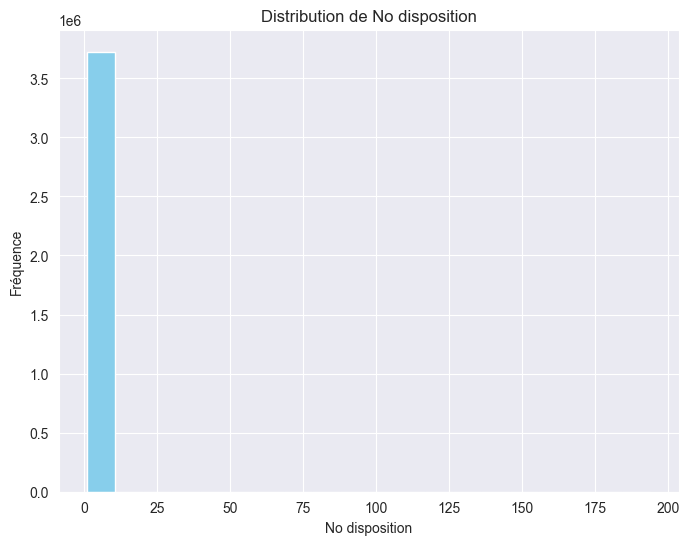

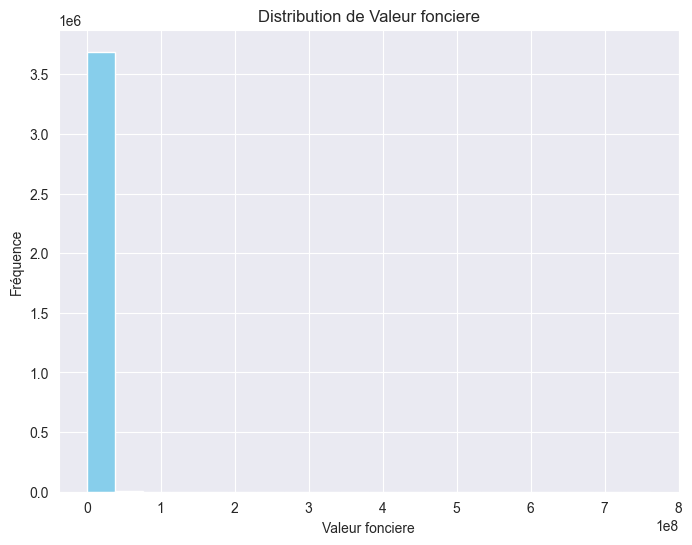

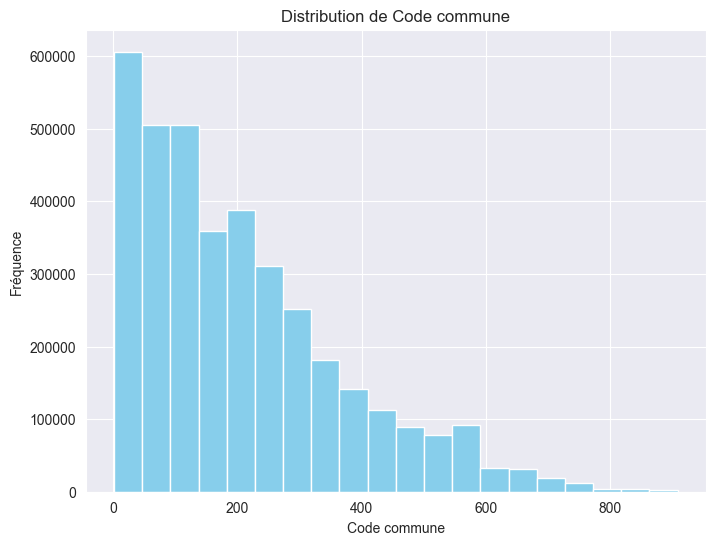

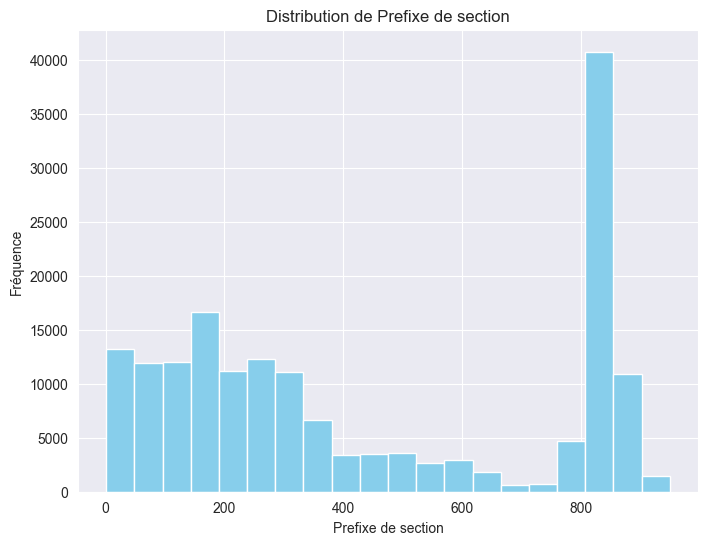

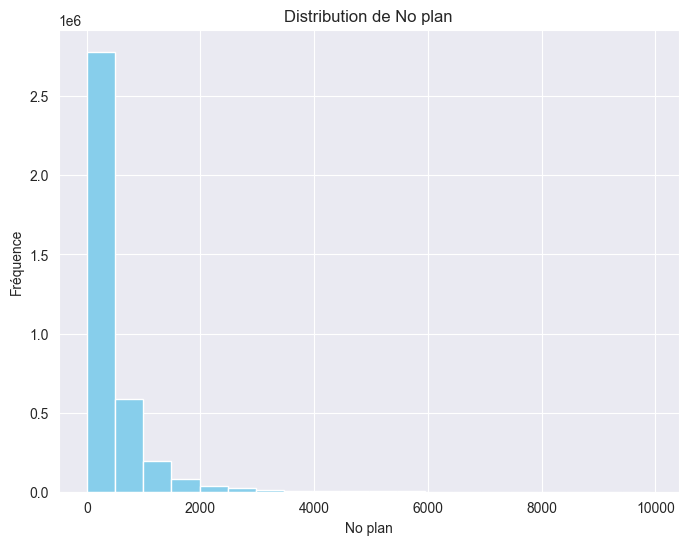

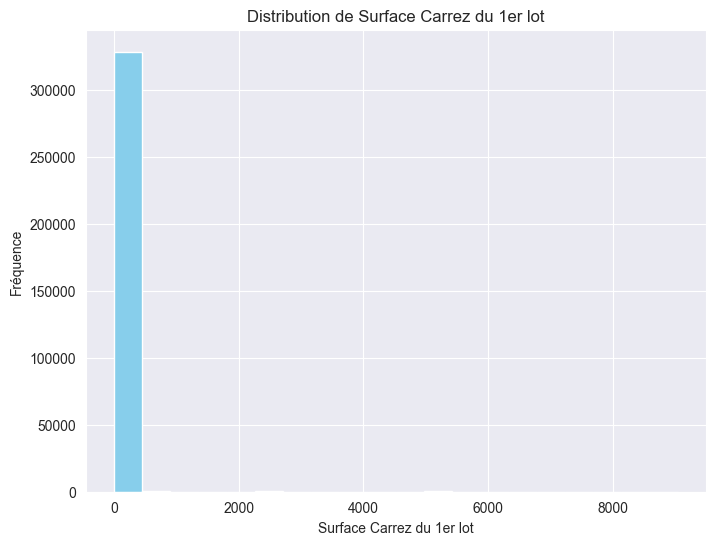

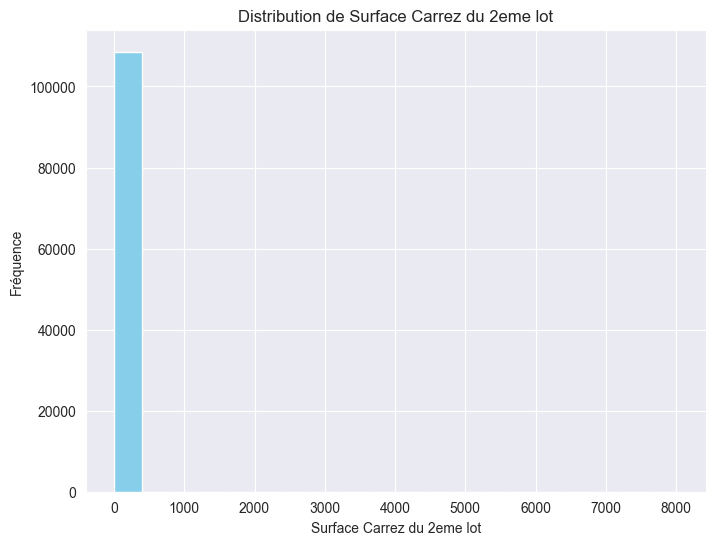

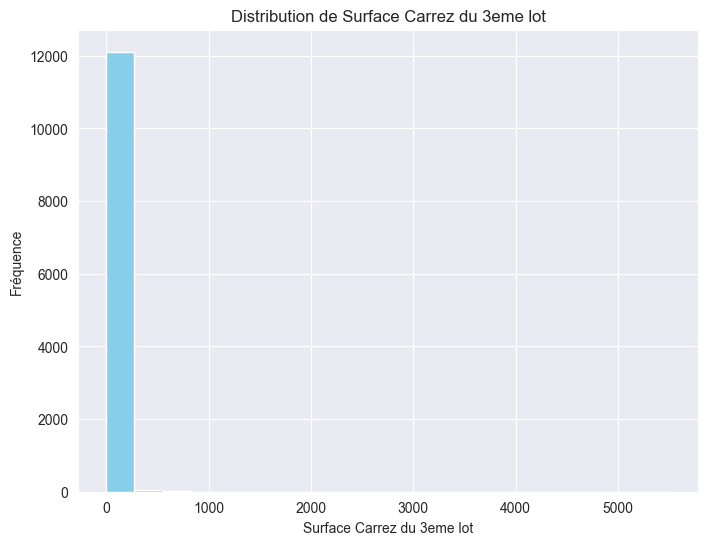

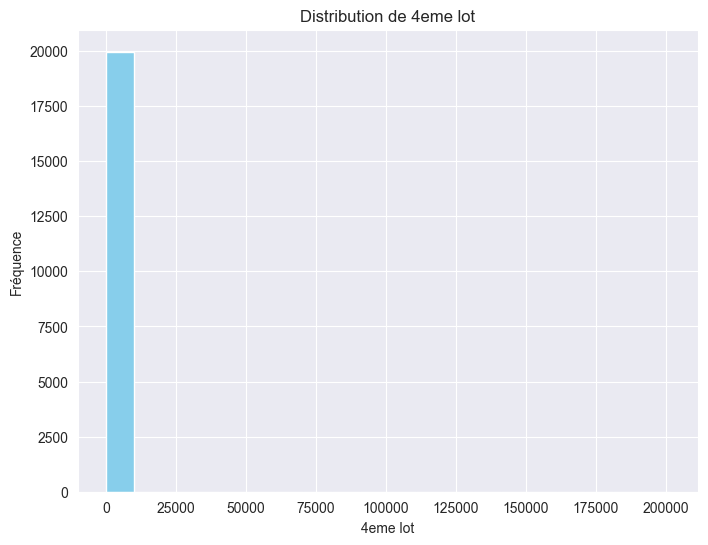

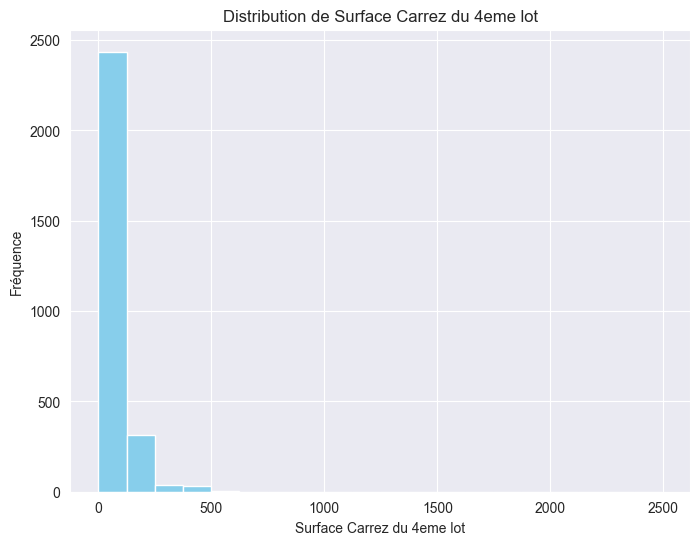

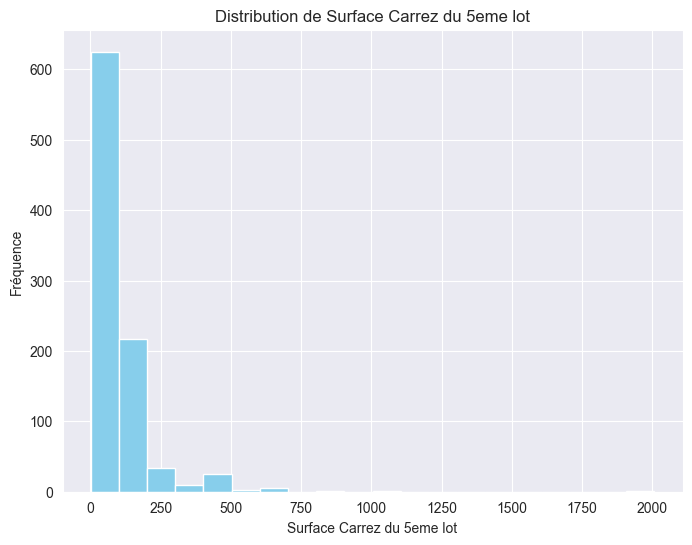

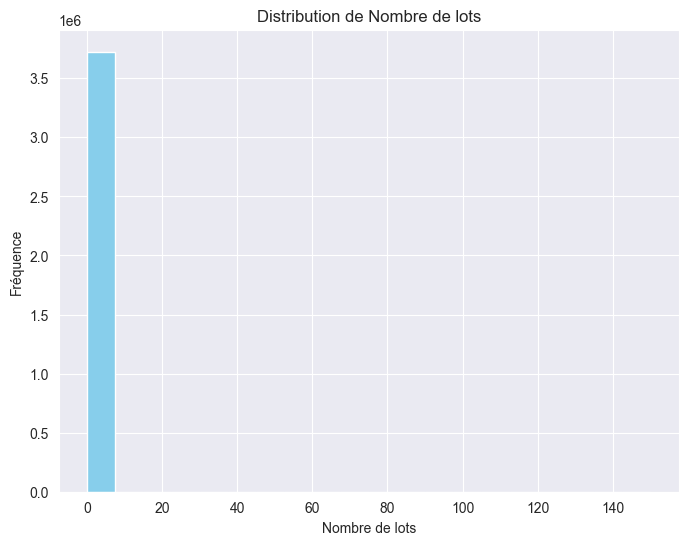

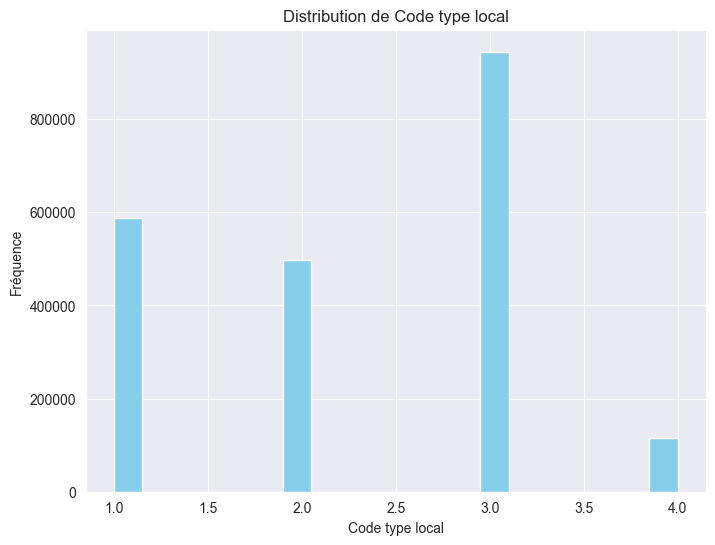

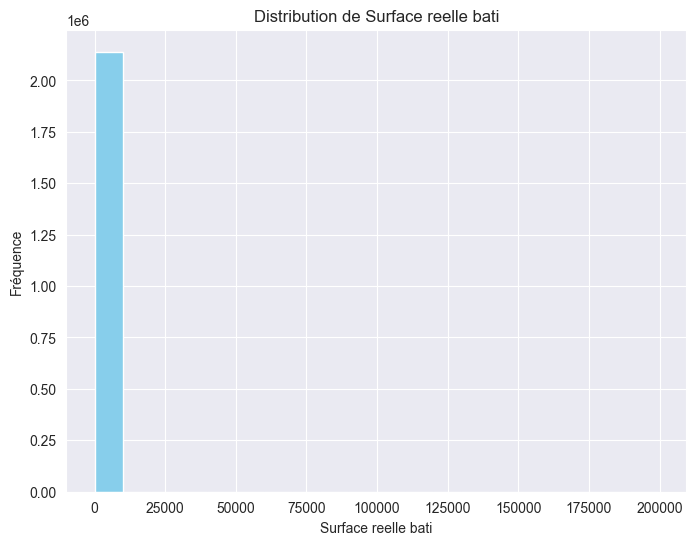

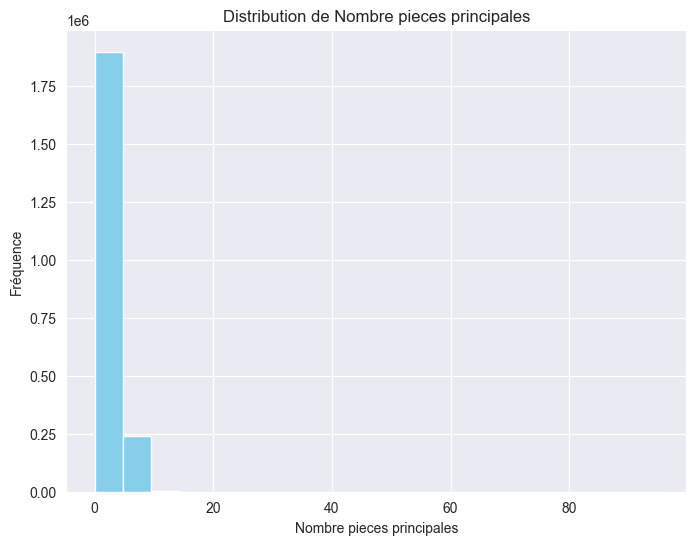

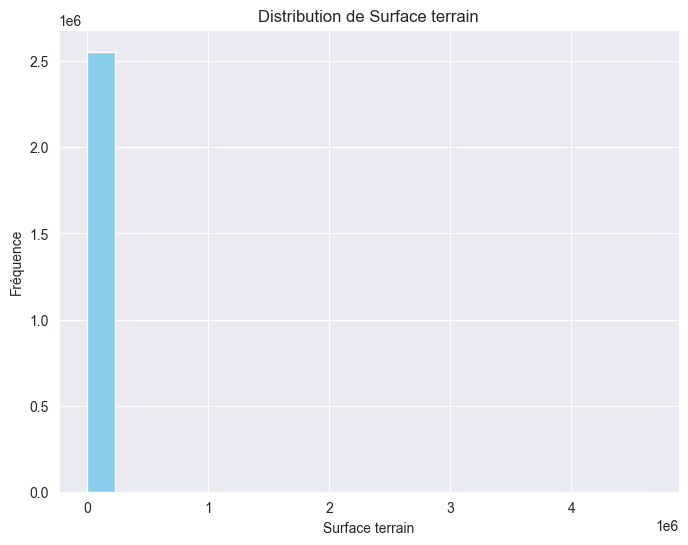

In [7]:
# Distribution des variables numériques
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(data[col], bins=20, color='skyblue')
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

Les types des datas

In [8]:
print(data.dtypes)

No disposition                  int64
Date mutation                  object
Nature mutation                object
Valeur fonciere               float64
Code departement               object
Code commune                    int64
Prefixe de section            float64
Section                        object
No plan                         int64
No Volume                      object
1er lot                        object
Surface Carrez du 1er lot     float64
2eme lot                       object
Surface Carrez du 2eme lot    float64
3eme lot                       object
Surface Carrez du 3eme lot    float64
4eme lot                      float64
Surface Carrez du 4eme lot    float64
5eme lot                       object
Surface Carrez du 5eme lot    float64
Nombre de lots                  int64
Code type local               float64
Surface reelle bati           float64
Nombre pieces principales     float64
Nature culture                 object
Nature culture speciale        object
Surface terr

In [9]:
# On remplace les NaN par 0
data.fillna(0, inplace=True)

# On supprime les lignes où la surface totale est nulle
data = data[data['Surface reelle bati'] > 0]

# virer les lignes avec code type local = 0
data = data[data['Code type local'] != 0]

In [10]:
# On remplace les NaN par des vides
data['Code departement'] = data['Code departement'].fillna('')
data['Code commune'] = data['Code commune'].fillna('')
data['Prefixe de section'] = data['Prefixe de section'].fillna('')
data['Section'] = data['Section'].fillna('')
data['Date mutation'] = data['Date mutation'].fillna('')

# On converti les données en float
data['Surface terrain'] = data['Surface terrain'].astype(float)
data['Surface reelle bati'] = data['Surface reelle bati'].astype(float)

# On fait le calcul de la surface combinée
data['Surface_combined'] = data['Surface terrain'] + data['Surface reelle bati']

# On regroupe les données pertinentes
aggregated_data = data.groupby(['Code departement', 'Code commune', 'Prefixe de section', 'Section', 'Date mutation']).agg({
    'Valeur fonciere': 'mean',
    'Surface_combined': 'sum',
    'Code type local': 'min'  
}).reset_index()

# On les convertit ensuite en types appropriés
aggregated_data['Code departement'] = aggregated_data['Code departement'].astype(str)
aggregated_data['Code commune'] = aggregated_data['Code commune'].astype(str)
aggregated_data['Prefixe de section'] = aggregated_data['Prefixe de section'].astype(str)
aggregated_data['Section'] = aggregated_data['Section'].astype(str)
aggregated_data['Date mutation'] = aggregated_data['Date mutation'].astype(str)
aggregated_data['Valeur fonciere'] = aggregated_data['Valeur fonciere'].astype(float)

# On attribue la valeur de l'Id
aggregated_data['Id'] = aggregated_data['Code departement'] + aggregated_data['Code commune'] + aggregated_data['Prefixe de section'] + aggregated_data['Section'] + aggregated_data['Date mutation']

# On observe le résultat
print(aggregated_data.head())

  Code departement Code commune Prefixe de section Section Date mutation  \
0                1            1                0.0       A    13/11/2023   
1                1            1                0.0      ZC    01/12/2023   
2                1            1                0.0      ZH    07/06/2023   
3                1            1                0.0      ZH    19/01/2023   
4                1            1                0.0      ZH    21/03/2023   

   Valeur fonciere  Surface_combined  Code type local                 Id  
0         420000.0            3266.0              1.0   110.0A13/11/2023  
1         155000.0            2853.0              1.0  110.0ZC01/12/2023  
2         210000.0            1057.0              1.0  110.0ZH07/06/2023  
3         270000.0            1673.0              1.0  110.0ZH19/01/2023  
4         240000.0            1045.0              1.0  110.0ZH21/03/2023  


Valeur foncière moyenne par type de propriété


In [11]:
average_values_by_type = data.groupby('Code type local')['Valeur fonciere'].mean()
print(average_values_by_type)

Code type local
1.0    3.247068e+05
2.0    9.232499e+05
3.0    7.500000e+03
4.0    2.063338e+06
Name: Valeur fonciere, dtype: float64


Valeur foncière moyenne par département 

In [12]:
average_values_by_departement = aggregated_data.groupby('Code departement')['Valeur fonciere'].mean()
print(average_values_by_departement)

Code departement
1      285730.078424
10     160279.160791
11     168210.209315
12     148830.252598
13     341002.566575
           ...      
95     338121.982268
971    344812.444268
972    263208.938370
973    281351.330957
974    281003.142363
Name: Valeur fonciere, Length: 97, dtype: float64


Interprétations et visualisations 


Prix moyen du mètre carré par département 


In [13]:
data['Prix_m2'] = data['Valeur fonciere'] / data['Surface reelle bati']

In [14]:
avg_price_per_department = data.groupby('Code departement')['Prix_m2'].median().reset_index()
avg_price_per_department

,Code departement,Prix_m2
0,1,2650.000000
1,2,1370.967742
2,3,1333.333333
3,4,2453.290578
4,5,2857.000000
...,...,...
94,974,3200.000000
95,29,2179.349951
96,2A,4339.285714
97,2B,3235.767059


Geomap de la répartition du prix moyen par mètre carré par département

In [15]:
sf = gpd.read_file('france-geojson/departements-version-simplifiee.geojson')
sf

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ..."
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ..."
...,...,...,...
91,91,Essonne,"POLYGON ((2.22656 48.77610, 2.23298 48.76620, ..."
92,92,Hauts-de-Seine,"POLYGON ((2.29097 48.95097, 2.32697 48.94536, ..."
93,93,Seine-Saint-Denis,"POLYGON ((2.55306 49.00982, 2.58031 48.99159, ..."
94,94,Val-de-Marne,"POLYGON ((2.33190 48.81701, 2.36395 48.81632, ..."


In [16]:
sf['code'] = sf['code'].apply(lambda x: x.zfill(2) if x.isdigit() else x)
avg_price_per_department['Code departement'] = avg_price_per_department['Code departement'].apply(lambda x: x.zfill(2) if x.isdigit() else x)

# Jointure des deux dataframes sur la colonne 'code' et 'Code departement'
df_merged = pd.merge(sf, avg_price_per_department[['Code departement', 'Prix_m2']], left_on='code', right_on='Code departement', how='left')


# Affichage du dataframe fusionné
df_merged

AttributeError: 'int' object has no attribute 'isdigit'

In [ ]:
import geoviews as gv

gv.extension('bokeh')
deps = gv.Polygons(df_merged, vdims=['code','Prix_m2'])
from geoviews import dim
deps.opts(width=600, height=600, toolbar='above', color=dim('Prix_m2'),
          colorbar=True , cmap = 'turbo', tools=['hover'], aspect='equal')

Graphique du prix moyen du mètre carré par département en 2023

In [ ]:
plt.figure(figsize=(22, 6))
sns.barplot(x='Code departement', y='Prix_m2', data=avg_price_per_department)
plt.title('Prix moyen du mètre carré par départements français en 2023')
plt.xlabel('Code département')
plt.ylabel('Prix par mètre carré (€)')
plt.show()



Prix moyen du mètre carré par type de propriété


In [ ]:
avg_price_by_type = data.groupby('Code type local')['Prix_m2'].median().reset_index()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Code type local', y='Prix_m2', data=avg_price_by_type)
plt.title('Prix moyen du mètre carré en fonction du type de propriété en 2023')
plt.xlabel('Code type local')
plt.ylabel('Prix par mètre carré en euros')
plt.legend(['1.0 : maison',
           '2.0 : appartement',
           '3.0 : dépendance',
           '4.0 : local industriel'], loc = "upper left")
plt.show()

Matrice de corrélation entre les variables


In [ ]:
correlation_matrix = data[['Valeur fonciere', 'Nombre pieces principales', 'Nombre de lots','Code type local', 'Surface reelle bati', 'Prix_m2']].corr()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()